In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
import nltk
from scipy import stats
import re
from  scipy.stats import ttest_ind
from wordcloud import WordCloud

In [2]:
data=pd.read_csv('Data/cleanedData.csv')
data.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CommentLength,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,NoOfStopWords,...,NoOfWords,NoOfUniqueWords,FleschReadingEase,GunningFog,SmogIndex,ARI,ColemanLiauIndex,TextStandard,AvgSentenceLength,CleanWordList
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,1.79,0,6.12,18,...,13,13,88.74,3.2,0.0,11.4,13.01,3.0,8.0,huh anyway check tube channel kobyoshi999
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,12.05,0,4.22,44,...,40,31,81.63,6.0,0.0,7.3,6.49,6.0,15.0,hey guy check new channel first vid u monkey '...


####  Correlation matrix

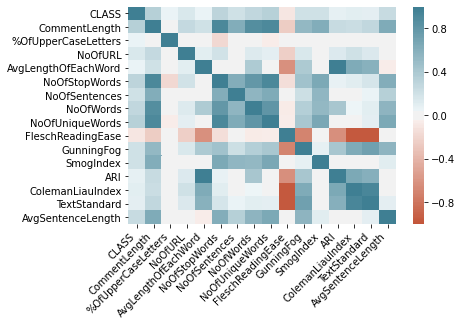

In [3]:
corr=data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [4]:
# stats.pointbiserialr(data['CLASS'],data['CommentLength',])

In [5]:
# data['CommentLength'].value_counts().plot(kind='bar');

#### Distribution of engineered features across Spam and Ham comments

##### Distribution of Comment length in both the categories

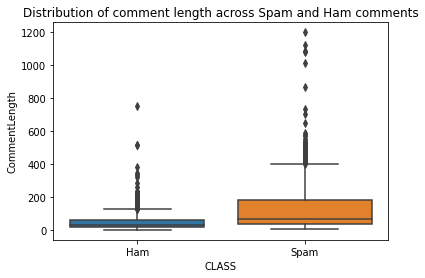

In [6]:
y=data['CommentLength']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of comment length across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

##### Distribution of % of uppercase letters in both the categories

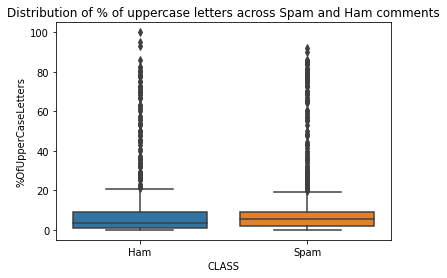

In [7]:
y=data['%OfUpperCaseLetters']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of % of uppercase letters across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Uppercase letter have similar distribution in Spam as well as in Ham comments.

##### Distribution of No. of URLs in both the categories

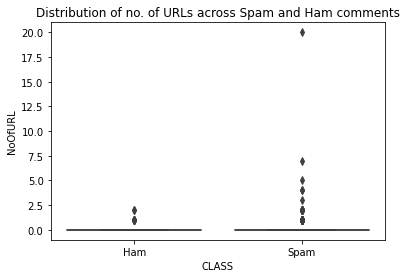

In [8]:
y=data['NoOfURL']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of URLs across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Let's remove the outlier here and then check the distribution

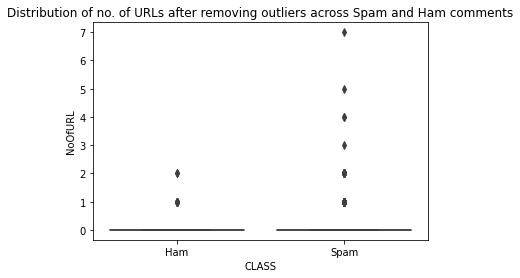

In [9]:
# After removing the outlier with NoOfUrls >10
filt=data['NoOfURL']<10
y=data.loc[filt,'NoOfURL']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of URLs after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

##### Distribution of average length of words in both the categories

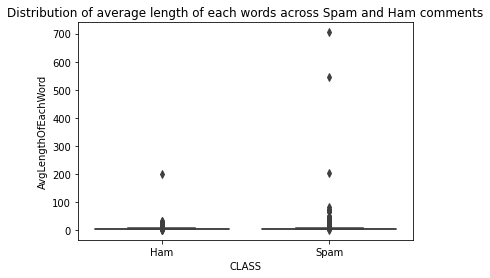

In [10]:
y=data['AvgLengthOfEachWord']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of average length of each words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

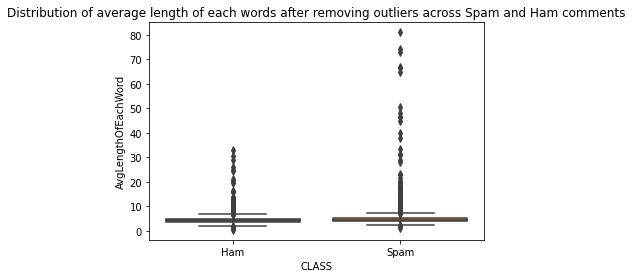

In [11]:
# After removing the outlier 
filt=data['AvgLengthOfEachWord']<150
y=data.loc[filt,'AvgLengthOfEachWord']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of average length of each words after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Spam comments are clearly have lengthier words than Ham comments.

##### Distribution of No. of stop words in both the categories

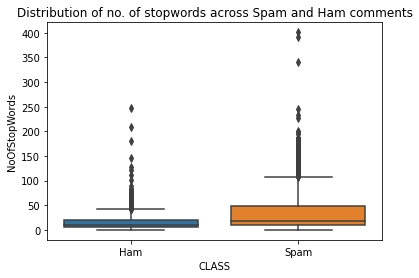

In [12]:
y=data['NoOfStopWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of stopwords across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Spam comments are lengthier than ham comments hence it makes sense that there are more stopwords in spam comments.

##### Distribution of No. of sentences in both the categories

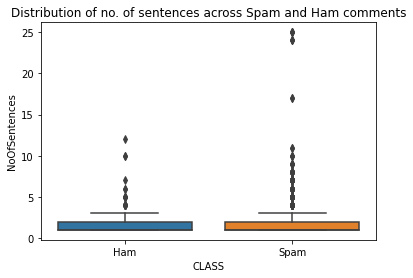

In [13]:
y=data['NoOfSentences']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of sentences across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Let's redraw the chart after removing records with more that 15 sentences.

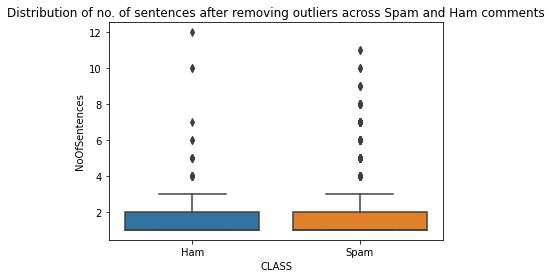

In [14]:
# After removing the outlier 
filt=data['NoOfSentences']<15
y=data.loc[filt,'NoOfSentences']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of sentences after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [15]:
filt1=data['NoOfSentences']<15 
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt1 & filt2,'NoOfSentences']
y_spam=data.loc[filt1 & filt3,'NoOfSentences']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values={'Ham':y_ham.quantile(q=[.25,.50,.75]),
          'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values)

,Ham,Spam
0.25,1.0,1.0
0.50,1.0,1.0
0.75,2.0,2.0


After removing the outliers, both the categories have similar distribution for no. of sentences.

##### Distribution of No. of words in both the categories

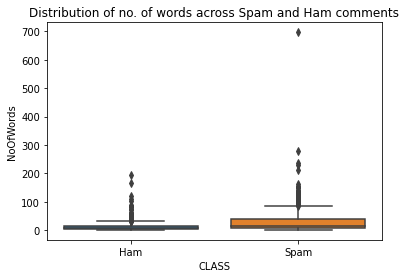

In [16]:
y=data['NoOfWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

There clearly seems to be an outlier in  Spam comments. 
Lets redraw the box plot after excluding the outlier.

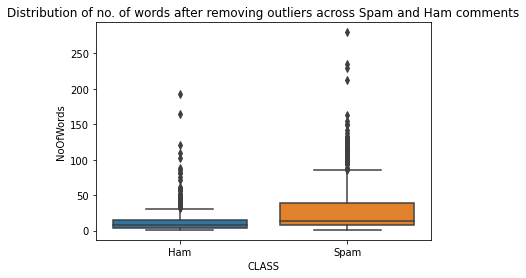

In [17]:
filt=data['NoOfWords']<400
y=data.loc[filt,'NoOfWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of words after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [18]:
filt1=data['NoOfWords']<600 
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt1 & filt2,'NoOfWords']
y_spam=data.loc[filt1 & filt3,'NoOfWords']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values2={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values2)

,Ham,Spam
0.25,4.0,8.0
0.50,8.0,14.0
0.75,15.0,39.0


The boxlplot and quantile values clearly shows that the spammy comments are more wordy. 


##### Distribution of No. of unique words in both the categories

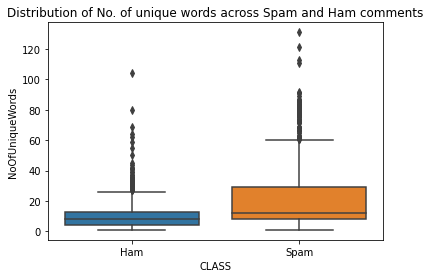

In [19]:
y=data['NoOfUniqueWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of No. of unique words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [20]:
filt1=data['CLASS']==0
filt2=data['CLASS']==1
y_ham=data.loc[filt1,'NoOfUniqueWords']
y_spam=data.loc[filt2,'NoOfUniqueWords']

# y_ham.quantile(q=[.25,.50,.75])
# y_spam.quantile(q=[.25,.50,.75])

df_values3={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values3)

,Ham,Spam
0.25,4.0,8.0
0.50,8.0,12.0
0.75,13.0,29.0


Spam comments have almost twice unique words than ham comments. 

##### Distribution of Text Standard in both the categories

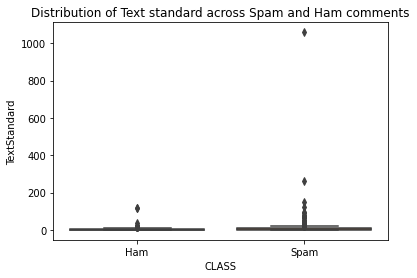

In [21]:
y=data['TextStandard']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of Text standard across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

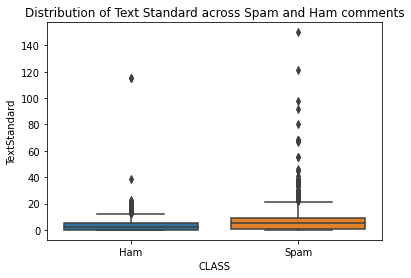

In [22]:
filt=data['TextStandard']<200
y=data.loc[filt,'TextStandard']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of Text Standard across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

#### **Hypothesis Testing**

H0= There is no difference in **engineered feature** in Spam or Ham comments

H1= There is difference

In [23]:
cols=['CommentLength','%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       'NoOfStopWords', 'NoOfSentences', 'NoOfWords', 'NoOfUniqueWords',
       'FleschReadingEase', 'GunningFog', 'SmogIndex', 'ARI',
       'ColemanLiauIndex', 'TextStandard', 'AvgSentenceLength']

c={'ColumnName':[],'t':[],'p_value':[]}

filt1=data['CLASS']==0
filt2=data['CLASS']==1

for col in cols:
    data_ham=data.loc[filt1,col]
    data_spam=data.loc[filt2,col]
    t, p_value = ttest_ind(data_ham,data_spam ,equal_var = False)
    c['ColumnName'].append(col)
    c['t'].append(t)
    c['p_value'].append(p_value.round(4))

t_pvalue=pd.DataFrame.from_dict(c)
t_pvalue.sort_values(by=['p_value'],ascending=False)

,ColumnName,t,p_value
1,%OfUpperCaseLetters,-2.527861,0.0116
3,AvgLengthOfEachWord,-2.658642,0.0080
11,ARI,-3.599932,0.0003
0,CommentLength,-16.458712,0.0000
2,NoOfURL,-6.965042,0.0000
4,NoOfStopWords,-13.996208,0.0000
5,NoOfSentences,-9.397164,0.0000
6,NoOfWords,-13.041307,0.0000
7,NoOfUniqueWords,-15.658672,0.0000
8,FleschReadingEase,4.082608,0.0000


In all the cases, p_value is close to 0 and hence we **reject the null hypothesis** and can say that there is difference in values for all the engineered features in spam and ham comments.

#### Analyze most frequent words

In [24]:
wordFreqDict={}
for wordlist in data['CleanWordList']:
    for word in wordlist.split(' '):
        if word not in wordFreqDict:
            wordFreqDict[word]=1
        else:
            wordFreqDict[word]+=1


df_mostFrequentWords=pd.DataFrame.from_dict(wordFreqDict,orient='index',columns=['wordFrequency'])

df_mostFrequentWords.sort_values(by=['wordFrequency'],ascending=False,inplace=True)
df_mostFrequentWords.reset_index(inplace=True)
df_mostFrequentWords.rename(columns={'index':'word'},inplace=True)
df_mostFrequentWords.head()

,word,wordFrequency
0,999,689
1,check,530
2,video,355
3,song,334
4,like,264


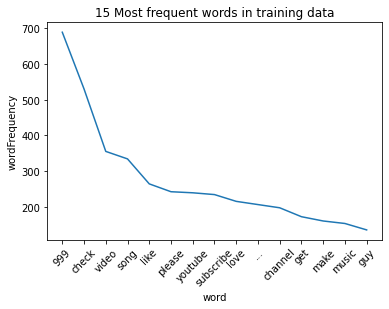

In [25]:
sns.lineplot(x=df_mostFrequentWords['word'].head(15),y=df_mostFrequentWords['wordFrequency'].head(15),sort=False)
plt.title('15 Most frequent words in training data')
plt.xticks(rotation=45);

- 999 is digit. We wil have to remove this before ML.
- ... can also be removed as it is just noise.

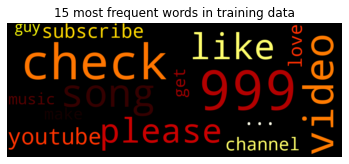

In [26]:
wc=WordCloud(width=1000,height=400,colormap='hot',max_words=15).generate_from_frequencies(frequencies=wordFreqDict)
plt.imshow(wc, interpolation="bilinear")
plt.title("15 most frequent words in training data")
plt.axis("off");